In [555]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # класс разбиения на данные для обучения и для проверки
from sklearn.preprocessing import MinMaxScaler
# импортируем функции
from functions import generate_random_array, plot_true_vs_predicted,  Functions

In [556]:
# Исходные данные
# создаем объект класса Functions 
main_function = Functions()


# определяем количетсво строк для обучения
main_function.n_samples = 200

# пределы варьирования признаков
main_function.limits = (-10, 10)

# определяем вид функции
main_function.set_function(main_function.trigonometric)


In [557]:
# Создаём модель
model01 = XGBRegressor(
                    n_estimators=1000,
                    max_depth=3,
                    learning_rate=0.1,
                    reg_alpha=0.5,
                    reg_lambda=0.5,
                    subsample=0.8,
                    random_state=1488,
                    verbosity=0
                    )
model01.fit(main_function.features, main_function.target);

In [558]:
# генерим еще случайные данные, в этот раз много для более глубокой проверки модели
# генерим случайный массив признаков от -10 до +10
test_features = generate_random_array(100, main_function.n_features, main_function.limits[0], main_function.limits[1], seed = 2204)
# Подставляем сгенерированный массив в функцию
test_target = main_function.function(*test_features.T)

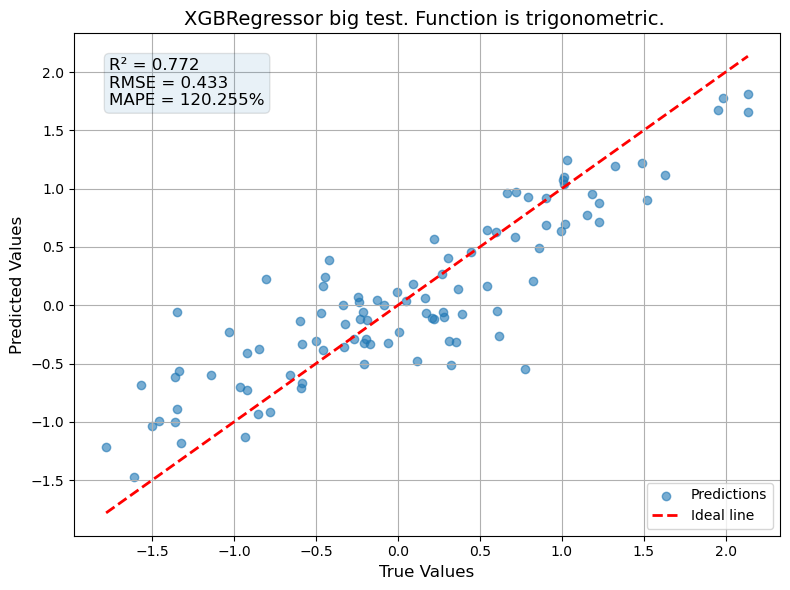

In [559]:
# Расчитываем отклик по данным для проверки
y_pred_big_test = model01.predict(test_features)
# посмотрим на результат
plot_true_vs_predicted (test_target, y_pred_big_test, title= f'XGBRegressor big test. Function is {main_function.function_name}. ')

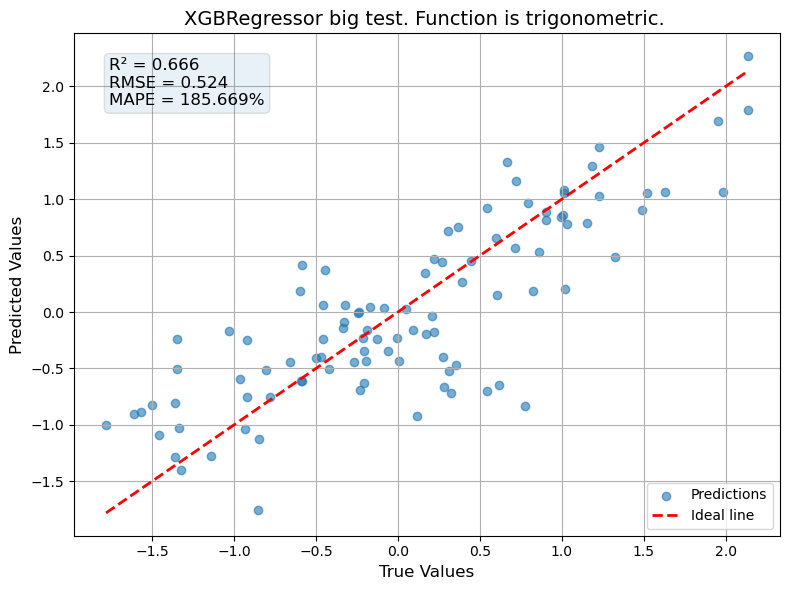

In [560]:
# все то же самое, но с масштабированием матрицы признаков
# масштабируем матрицу признаков 
scaler = MinMaxScaler(feature_range=(-1, 1))
main_function.features_scaled = scaler.fit_transform(main_function.features) 
test_features_scaled = scaler.fit_transform(test_features) 


# Создаём и обучаем модель
model02 = XGBRegressor(
                    n_estimators=1000,
                    max_depth=3,
                    learning_rate=0.1,
                    reg_alpha=0.5,
                    reg_lambda=0.5,
                    subsample=0.8,
                    random_state=42,
                    verbosity=0
                    )
model02.fit(main_function.features_scaled, main_function.target);
# Расчитываем отклик по данным для проверки
y_pred_big_test = model02.predict(test_features_scaled)
# Подставляем сгенерированный массив в функцию
test_target = main_function.function(*test_features.T)
# Посмотрим на результат
# посмотрим на результат
plot_true_vs_predicted (test_target, y_pred_big_test, title= f'XGBRegressor big test. Function is {main_function.function_name}. ')